## Evalution 

In [18]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

In [19]:
# load Prediction
path = r'../models/predictions.parquet'
df = pd.read_parquet(path)

In [20]:
df.head()

,y_true,y_prob,y_pred,thresholds
0,0,0.000083,0,0.386923
1,0,0.000093,0,0.386923
2,0,0.000340,0,0.386923
3,0,0.000068,0,0.386923
4,0,0.000153,0,0.386923


In [21]:
y_true = df["y_true"]
y_prob = df["y_prob"]

In [22]:
# get threshold
if "threshold_used" in df.columns:
    best_threshold = df["threshold_used"].iloc[0]
else:
    best_threshold = 0.5
    
print(f"Using Threshold = {best_threshold}")

Using Threshold = 0.5


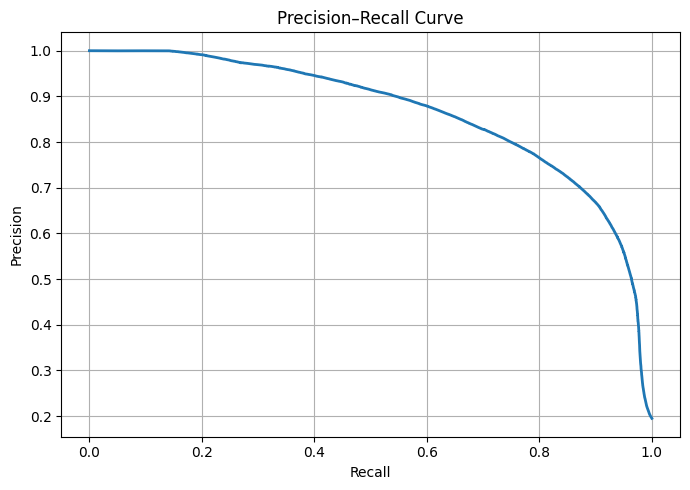

In [23]:
# Precision-Recall Curve

precision, recall, pr_thresholds = precision_recall_curve(y_true, y_prob)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

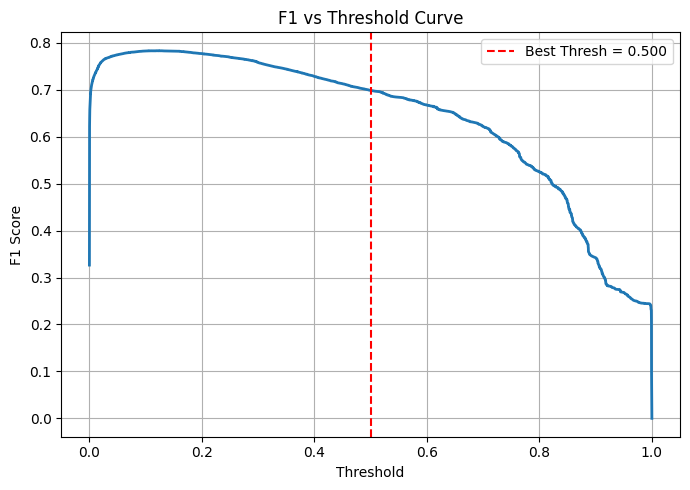

In [24]:
# F1 SCORE VS THRESHOLD CURVE

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

thr_full = np.append(pr_thresholds, 1.0)

plt.figure(figsize=(7, 5))
plt.plot(thr_full, f1_scores, linewidth=2)
plt.axvline(best_threshold, color="red", linestyle="--", label=f"Best Thresh = {best_threshold:.3f}")
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 vs Threshold Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# confusion matrix at best threhold
y_pred_best = (y_prob >= best_threshold).astype(int)
cm = confusion_matrix(y_true, y_pred_best)

print("\nConfusion Matrix at Best Threshold:")
print(cm)


Confusion Matrix at Best Threshold:
[[294301   5256]
 [ 30808  41788]]


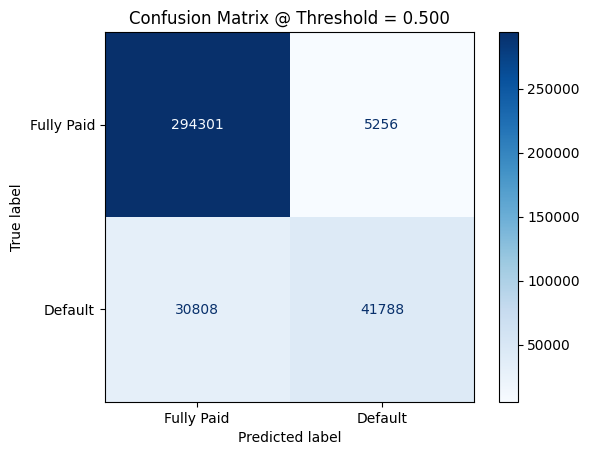

In [26]:
disp = ConfusionMatrixDisplay(cm, display_labels=["Fully Paid", "Default"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix @ Threshold = {best_threshold:.3f}")
plt.grid(False)
plt.show()